# 我们第一个（极小的）机器学习应用

> 目的：一个网站根据现有数据（一段时间内，每小时的访问量），来预判访问量的将来的变化情况，

> 来判断何时需要升级服务器配置。

>数据存储在文件web_traffic.tsv当中。

In [12]:
import scipy as sp
import numpy as np
data=sp.genfromtxt("web_traffic.tsv",delimiter="\t")
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [3]:
print(data.shape)

(743, 2)


可以看出data是一个二维**数组**,（743行，2列）。具体含义是：*统计了743个小时，每个小时该网站的点击量是多少，其中有一些小时没有统计到，也不是说没有访问量，用**nan**标示。*

In [16]:
x=data[:,0] #返回第一列数据，返回类型为数组
y=data[:,1] #返回第二列数据，返回类型为数组

这种切片取值的方式太灵活了，灵活的我都不敢相信了，但是这也是只能用在numpy的数组当中，普通的列表是不能用的。

In [18]:
# 数组y里面含有一些，无效值"nan"
sp.isnan(y) #返回一个bool型数组，有743个元素
sum(sp.isnan(y)) #其中有8个True，也就是说有8个无效值。

8

In [19]:
#那么有效值就为：
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]

### 第一印象

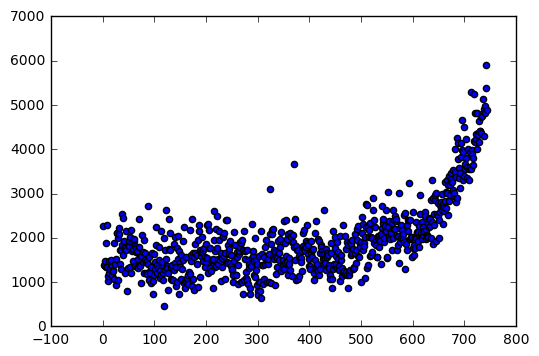

In [25]:
import matplotlib.pyplot as plt #导入画图工具
plt.scatter(x,y) #将准备好的（x,y）值，以X中数据为横坐标，以Y中数据位纵坐标描绘散点图，默认是蓝色圆点
plt.show() #将所绘图展示出来。

In [ ]:
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()